# Business Understanding

Salah satu bank terkemuka ingin memprediksi nasabah yang terindikasi kredit macet saat mengajukan pinjaman. Pemberi pinjaman biasanya membuat dua jenis keputusan:

1. Pertama, apakah akan memberikan kredit kepada pemohon baru, dan
2. Kedua, bagaimana menangani pemohon yang sudah ada, termasuk apakah akan meningkatkan batas kredit mereka.

Dalam kedua kasus, apapun teknik yang digunakan, sangat penting bahwa ada sampel besat pelanggan sebelumnya dengan detail aplikasi, pola perilaku, dan riwayat kredit beriktunya yang tersedia. Sebagian besar karakteristik konsumen (pendapatan tahunan, usia, jumlah tahun bekerja engan memberi kerja saat ini, dll) dan riwayat merekan selanjutnya. Area aplikasi khas di pasar konsumen meliputi: kartu kredit, pinjaman mobil, hipotek rumah, pinjaman ekuitas rumah, pesanan katalog surat, dan berbagai macam produk pinjaman pribadi.

Objectives 1 : Prediktive pengajuan nasabah kartu kredit yang baru akan gagal bayar atau tidak
## Prediktif Analytic untuk Meminimalisir Angka Resiko Nasabah Baru yang Berpotensi Gagal Bayar pada Pengajuan Kartu Kredit Menggunakan Pendekatan Sains Data

Case : Klasifikasi --> Supervised Learning

Kemungkinan Algoritma yang akan dipergunakan:

1. Decision Tree
2. Random Forest
3. Logistic Regression
4. SVM (Support Vector Machine)
5. XGBOOST Classifier


Objectives 2 : Prediktive kenaikan angka kredit pada nasabah yang sudah ada
## Implementasi Machine Learning untuk Predictive sebagai Langkah Optimalisasi Nilai Kredit OLD Nasabah pada Bank XX Menggunakan ...

Case : Estimasi

Kemungkinan Algoritma yang akan dipergunakan:

1. Linier Regression
2. ANN (Artificial Neural Network)

In [ ]:
# Memanggil Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Understanding

In [ ]:
# Mengubungkan Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/PDA_DataSource/credit_risk_1.csv'

load_data_cr = pd.read_csv(path)
load_data_cr

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...,...
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [ ]:
# Membuat data frame

df = pd.DataFrame(load_data_cr)
df.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


Data Decscription There are 9 attributes containing 850 customer records followed by :

age : Umur nasabah

ed : Level pendidikan nasabah

employ : Masa jabatan dengan pemberi kerja saat ini (dalam tahun)

addres : Jumlah tahun di alamat yang sama

income : Pendapatan nasabah

debtinc : Debt to income ratio (Rasio hutang terhadap pendapatan) adalah semua pembayaran hutang bulanan anda dibagi dengan pendapatan kotor bulanan anda. Angka ini adalah salah satu cara pemberi pinjaman mengukur kemampuan anda untuk mengelola pembayaran bulanan untuk melunasi uang yang anda rencanakan untuk dipinjam. Rasio hutang terhadap pendapatan anda tidak secara langung mempengaruhi nilai kredit anda. Ini karena lembaga kredit tidak tahu berapa banyak uang yang anda peroleh, sehingga tidak dapat melakukan perhitungan.

creddebt : Credit to debt ratio (Rasio kredit terhadap utang), Menunjukan bahwa presentase rasio hutang terhadap kredit yang baik di bawah 30%. Dan itu berlaku untuk rasio anda pada salah satu kartu anda secara terpisah serta untuk rasio keseluruhan anda.

othdebt : Utang lainnya

default : Label nasabah gagal di masa lalu (1 = gagal, 0 = tidak pernah gagal)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


Tipe data semuanya numerik. Tetapi case nya adalah klasifikasi. Sehingga pada tahap pemodelan data variabel dependen/variabel target harus dirubah kedalam bentuk kategori

Syarat KLASIFIKASI
  1. Variabel target/dependen --> Kategorik
  2. Input variabel bisa kategorik atau bisa numerik

VARIABEL TARGET/DEPENDEN : default
Input variabel :
1. age
2. ed
3. employ
4. adress
5. income
6. debtinc
7. creddebt
8. othdebt

In [ ]:
df.isnull().sum()

Unnamed: 0    0
age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default       0
dtype: int64

In [ ]:
# Melakukan cek value jumlah default berdasarkan gagal atau tidak (1 atau 0)

df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [ ]:
df['ed'].value_counts()

1    372
2    198
3     87
4     38
5      5
Name: ed, dtype: int64

In [ ]:
df_data_cr = pd.DataFrame(load_data_cr)

In [ ]:
df = df_data_cr[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']]

<function matplotlib.pyplot.show(close=None, block=None)>

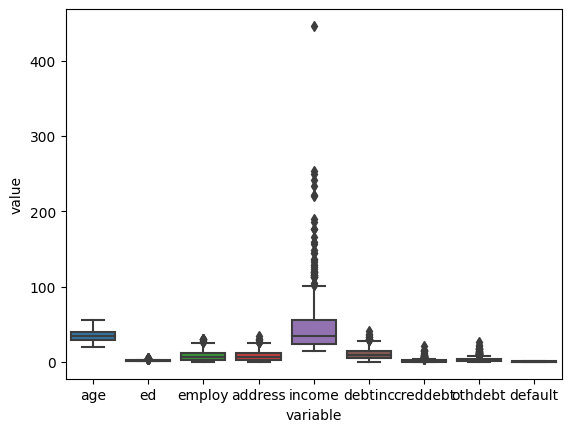

In [ ]:
# Menganalisia kondisi data, melihat Outlier pada adata

sns.boxplot(x = 'variable', y = 'value', data = pd.melt(df))
plt.show

Variabel income memiliki nilai yang cenderung tinggi daripada variabel lainnya. Karena INCOME itu adalah UANG

In [ ]:
df_a = df[['age', 'ed', 'employ', 'address', 'debtinc', 'creddebt']]

<function matplotlib.pyplot.show(close=None, block=None)>

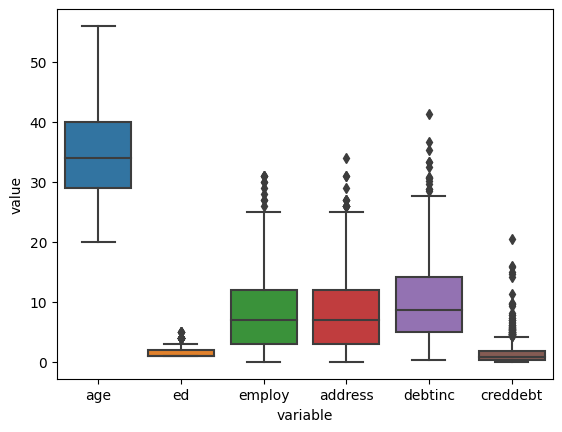

In [ ]:
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(df_a))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

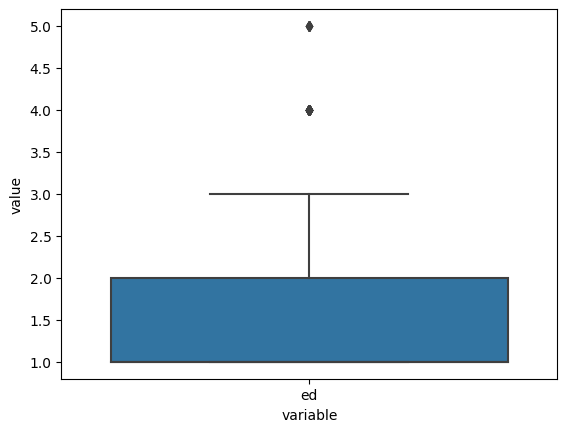

In [ ]:
df_b = df[['ed']]

sns.boxplot(x = 'variable', y = 'value', data = pd.melt(df_b))
plt.show

1. Calon nasabah kredit di dominasi usia diatas 20
2. Tingkat pendidikan calon nasabah ada 5 yaitu SD/SMP/SMA/S1/S2. Dimana tingkat pendidikan 1 dan 2 berada pada area boxplot (sebarannya banyak). Sedangkan ED 3 -> lebih sedikit. Makin sedikit level pendidikan maka makin besar peluang pengajuan kreditnya
3. Orang mengajukan kredit jika mereka sudah diatas 2 tahun tinggal di tempat yang sama, jabatan yang sama, rasio debtic dalam 2 tahun (nilainnya sama)
4. Ada banyak calon nasabah kredit memiliki hutang lainnya.

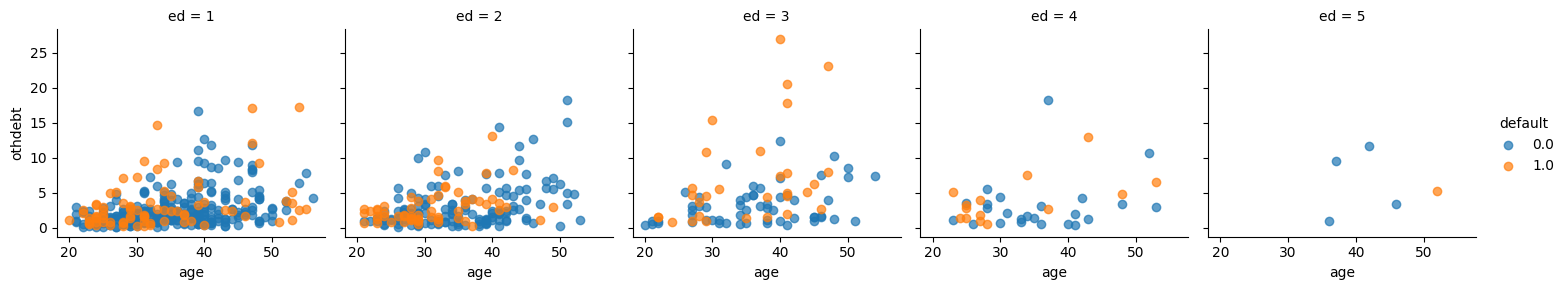

In [ ]:
scatplot = sns.FacetGrid(df_data_cr, col = 'ed', hue = 'default')
scatplot.map(plt.scatter, 'age', 'othdebt', alpha=.7)
scatplot.add_legend()

1. Potensi gagal bayar didominasi pada range usia 20 sd 30 pada level ED 1
2. Potensi gagal bayar didominasi pada range usia 20 sd 35 pada level ED 2
3. Potensi gagal bayar didominasi pada range usia 20 sd 45 pada level ED 3
4. Potensi gagal bayar didominasi pada range usia 20 sd 28 pada level ED 4
5. Potensi gagal bayar didominasi pada range usia diatas 50 pada level ED 5

# Data Preparation

Mencari NULL value dan NAN value

In [ ]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [ ]:
df.isna().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

# Pemodelan Data

In [ ]:
#Split Training and Testing

from sklearn.model_selection import train_test_split #import train_test_split function
from sklearn import metrics #import scikit-learn metrics module for accuracy calculation

In [ ]:
# Evaluation Mpdel

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Input variable x

x = df[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]

# Input variable y

y = df_data_cr['default'].astype('category')

In [ ]:
# SPLIT Testing & Training ---- Supervised Learning

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

Data Training 70% dan Testing 30%

## Pemodelan Menggunakan Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [ ]:
# Membuat objek Algoritma Decision Tree Klasifikasi
tree =DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6)

# Memodelkan data menggunakan algoritma Decision Tree
model_tree = tree.fit(x_train,y_train)

# Melakukan predict pada data test
pred_tree = model_tree.predict(x_test)

## Evaluasi Decision Tree Klasifikasi

In [ ]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81       155
         1.0       0.48      0.53      0.50        55

    accuracy                           0.73       210
   macro avg       0.66      0.66      0.66       210
weighted avg       0.74      0.73      0.73       210



Model tidak bisa dipergunakan

Text(113.9222222222222, 0.5, 'predicted label')

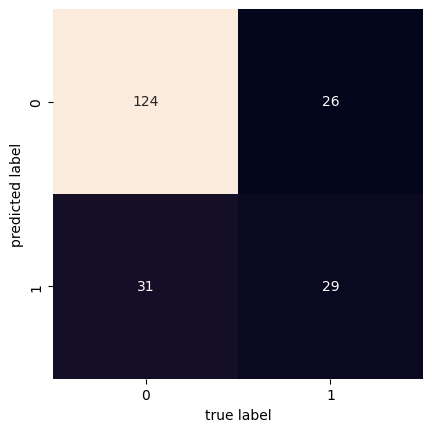

In [ ]:
# Visualize the confusion matrix of Decision Tree
mat = confusion_matrix(y_test, pred_tree)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

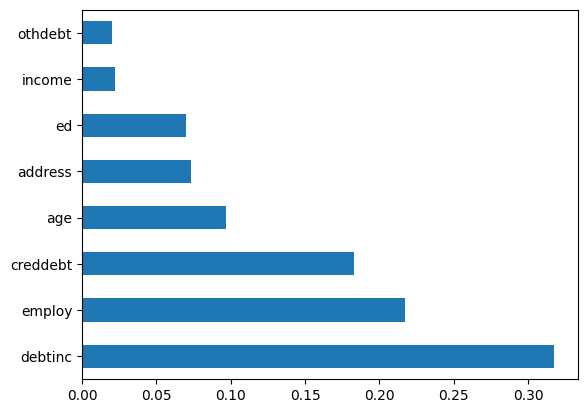

In [ ]:
# Signifikan faktor model XGBoost dari model tersebut yg menggambarkan nasabah gagal bayar/tidak

feat_importances = pd.Series(model_tree.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Pemodelan Menggunakan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Memodelkan data menggunakan algoritma Random Forest
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=6)

# Memodelkan data menggunakan algoritma Random Forest
model_rf= clf_rf.fit(x_train,y_train)

# Melakukan predict pada data test
pred_rf = model_rf.predict(x_test)

## Evaluasi Model Random Forest

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       155
         1.0       0.67      0.33      0.44        55

    accuracy                           0.78       210
   macro avg       0.73      0.63      0.65       210
weighted avg       0.76      0.78      0.75       210



Text(113.9222222222222, 0.5, 'predicted label')

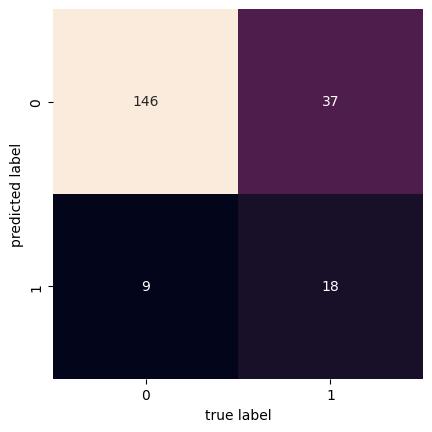

In [ ]:
# Visualize the confusion matrix of Random Forest
mat = confusion_matrix(y_test, pred_rf)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

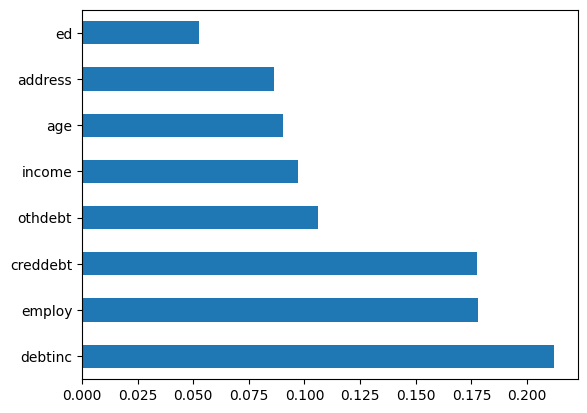

In [ ]:
# Signifikan faktor model Random Forest dari model tersebut yg menggambarkan nasabah gagal bayar/tidak

feat_importances = pd.Series(model_rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Pemodelan menggunakan XGBOOST Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf_xg = XGBClassifier()

# Memodelkan data menggunakan algoritma XGBoost
model_xg= clf_xg.fit(x_train,y_train)

# Melakukan predict pada data test
pred_xg = model_xg.predict(x_test)

## Evaluasi Report Model XGBoostClassifier

In [ ]:
print(classification_report(y_test, pred_xg))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       155
         1.0       0.55      0.44      0.48        55

    accuracy                           0.76       210
   macro avg       0.68      0.65      0.66       210
weighted avg       0.74      0.76      0.75       210



Text(113.9222222222222, 0.5, 'predicted label')

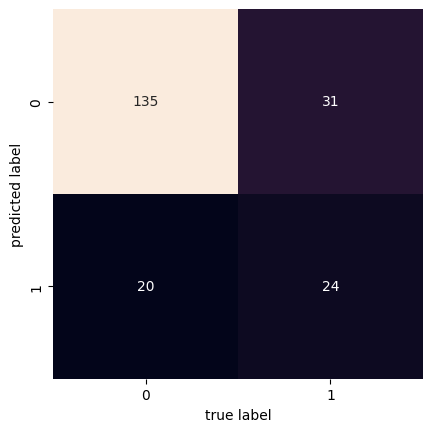

In [ ]:
# Visualize the confusion matrix of XGBoost
mat = confusion_matrix(y_test, pred_xg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

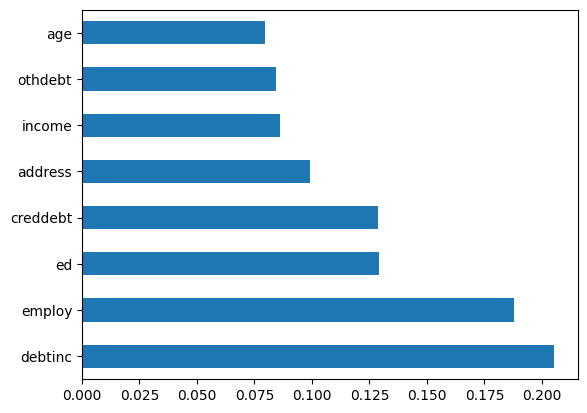

In [ ]:
# Signifikan faktor model XGBoost dari model tersebut yg menggambarkan nasabah gagal bayar/tidak

feat_importances = pd.Series(model_xg.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Pemodelan Menggunakan Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf_lg = LogisticRegression()

# Memodelkan data menggunakan algoritma Logistic Regression
model_lg= clf_lg.fit(x_train,y_train)

# Melakukan predict pada data test
pred_lg = model_lg.predict(x_test)

## Evaluasi Logistic Regression

In [ ]:
print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       155
         1.0       0.73      0.40      0.52        55

    accuracy                           0.80       210
   macro avg       0.77      0.67      0.70       210
weighted avg       0.79      0.80      0.78       210



Text(113.9222222222222, 0.5, 'predicted label')

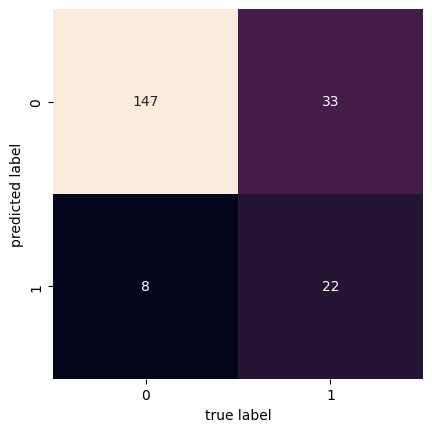

In [ ]:
# Visualize the confusion matrix of Logistic Regression
mat = confusion_matrix(y_test, pred_lg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Pemodelan Menggunakan SVM

In [ ]:
# Import SVM
from sklearn.svm import SVC

In [ ]:
clf_svm = SVC(kernel='linear', random_state=0)

# Memodelkan data menggunakan algoritma SVM
model_svm= clf_svm.fit(x_train,y_train)

# Melakukan predict pada data test
pred_svm = model_svm.predict(x_test)

## Evaluasi Report Model SVM

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       155
         1.0       0.73      0.44      0.55        55

    accuracy                           0.81       210
   macro avg       0.78      0.69      0.71       210
weighted avg       0.80      0.81      0.79       210



Text(113.9222222222222, 0.5, 'predicted label')

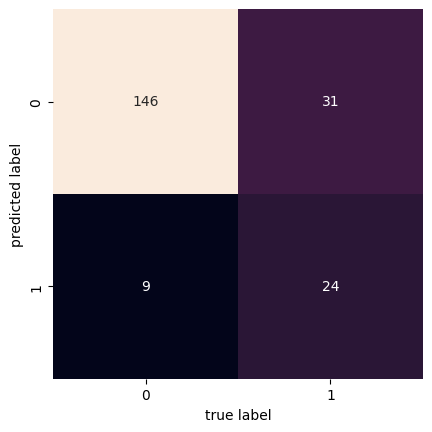

In [ ]:
# Visualize the confusion matrix of SVM
mat = confusion_matrix(y_test, pred_svm)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Implementasi Model

Model terbaik didapatkan menggunakan SVM dengan akurasi 81% dan presisi 82%

In [ ]:
# Load Data nasabah baru/calon nasabah yg mengajukan kredit

path1 = '/content/drive/MyDrive/PDA_DataSource/credit_risk_2.csv'

load_data1 = pd.read_csv(path1)

# DataFrame

df_newNasabah = pd.DataFrame(load_data1)
df_newNasabah.head()


,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN


In [ ]:
df_newNasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  150 non-null    int64  
 1   age         150 non-null    int64  
 2   ed          150 non-null    int64  
 3   employ      150 non-null    int64  
 4   address     150 non-null    int64  
 5   income      150 non-null    int64  
 6   debtinc     150 non-null    float64
 7   creddebt    150 non-null    float64
 8   othdebt     150 non-null    float64
 9   default     0 non-null      float64
dtypes: float64(4), int64(6)
memory usage: 11.8 KB


In [ ]:
# Input Variabel untuk predict

x2 = df_newNasabah[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]

In [ ]:
# Predict menggunakan Model SVM

prediction_svm = model_svm.predict(x2)

In [ ]:
prediction_svm

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Membuat object baru untuk preparing export hasil pemodelan data menggunkan data baru

In [ ]:
df_pred = pd.DataFrame({'prediction': prediction_svm}).round(3)
df_pred.head()

,prediction
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [ ]:
df4 = x2

In [ ]:
df_hasil_predict = pd.concat([df4, df_pred], sort=True, axis=1)

In [ ]:
df_hasil_predict

,age,ed,employ,address,income,debtinc,creddebt,othdebt,prediction
0,36,1,16,13,32,10.9,0.544128,2.943872,0.0
1,50,1,6,27,21,12.9,1.316574,1.392426,0.0
2,40,1,9,9,33,17.0,4.880700,0.729300,1.0
3,31,1,5,7,23,2.0,0.046000,0.414000,0.0
4,29,1,4,0,24,7.8,0.866736,1.005264,0.0
...,...,...,...,...,...,...,...,...,...
145,34,1,12,15,32,2.7,0.239328,0.624672,0.0
146,32,2,12,11,116,5.7,4.026708,2.585292,0.0
147,48,1,13,11,38,10.8,0.722304,3.381696,0.0
148,35,2,1,11,24,7.8,0.417456,1.454544,0.0


In [ ]:
df_hasil_predict['prediction'].value_counts()

0.0    127
1.0     23
Name: prediction, dtype: int64

Dari hasil tersebut, maka Bank akan memutuskan ada sebanyak 127 calon nasabah yang diterima permohonan kreditnya dan ada 23 nasabah yang ditolah permohonan kreditnya

IMPORT dan DOWNLOAD to CSV

In [ ]:
# Eksport to CSV
# Exsport as download if in colab
from google.colab import files

# Menyimpan file/eksport file to local computer output CSV file

df_hasil_predict.to_csv('df_hasil_predict.csv', sep=',')
files.download('df_hasil_predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Implementasi machine learning untuk Predictive sebagai langkah optimalisasi nilai kredit pada OLD Nasabah Bank XX.

Case : Estimasi

Kemungkinan Algoritma yang digunakan:

1. Linier Regression
2. ANN (Artificial Neural Network)

Bagaimana menangani pemohon yang sudah ada, termasuk apakah akan meningkatkan batas kredit mereka...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 49.3 KB


In [ ]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


## Nasabah menunjukan bahwa presentase rasio hutang terhadap kredit yang baik di bawah 30%,
Kondisikedua jika mau menaikan limit kredit, maka merefer nasabah2 yang belum pernah gagal bayar

In [ ]:
df_1 = df[(df['creddebt']<=0.3)&(df['default']==0)]

df_1.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
10,27,1,0,1,16,1.7,0.182512,0.089488,0.0
11,25,1,4,0,23,5.2,0.252356,0.943644,0.0
19,41,3,0,21,26,1.7,0.099008,0.342992,0.0
29,26,3,2,1,37,14.2,0.204906,5.049094,0.0


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 7 to 693
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       115 non-null    int64  
 1   ed        115 non-null    int64  
 2   employ    115 non-null    int64  
 3   address   115 non-null    int64  
 4   income    115 non-null    int64  
 5   debtinc   115 non-null    float64
 6   creddebt  115 non-null    float64
 7   othdebt   115 non-null    float64
 8   default   115 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 9.0 KB


Dari hasil filterisasi data, maka didapatkan ada 115 OLD nasabah yang akan diberikan kenaikan limitasi kredit

Pada casae estimasi ini, biasanya terkait dengan analisis korelasi.

Kita bisa menggunkan analisis korelasi untuk melihat hubungan linieritas, sehingga bisa memutuskan varibel yang mana akan dijadikan signifikas faktor (indikator pemodelan/input variabel)

Tetapi jika tidak memunjukan adanya linieritas dalam data, maka bisa dipergunakan algoritma yang mendukung pengolahan data NON LINIER

<Axes: title={'center': 'Pearson Correlation'}>

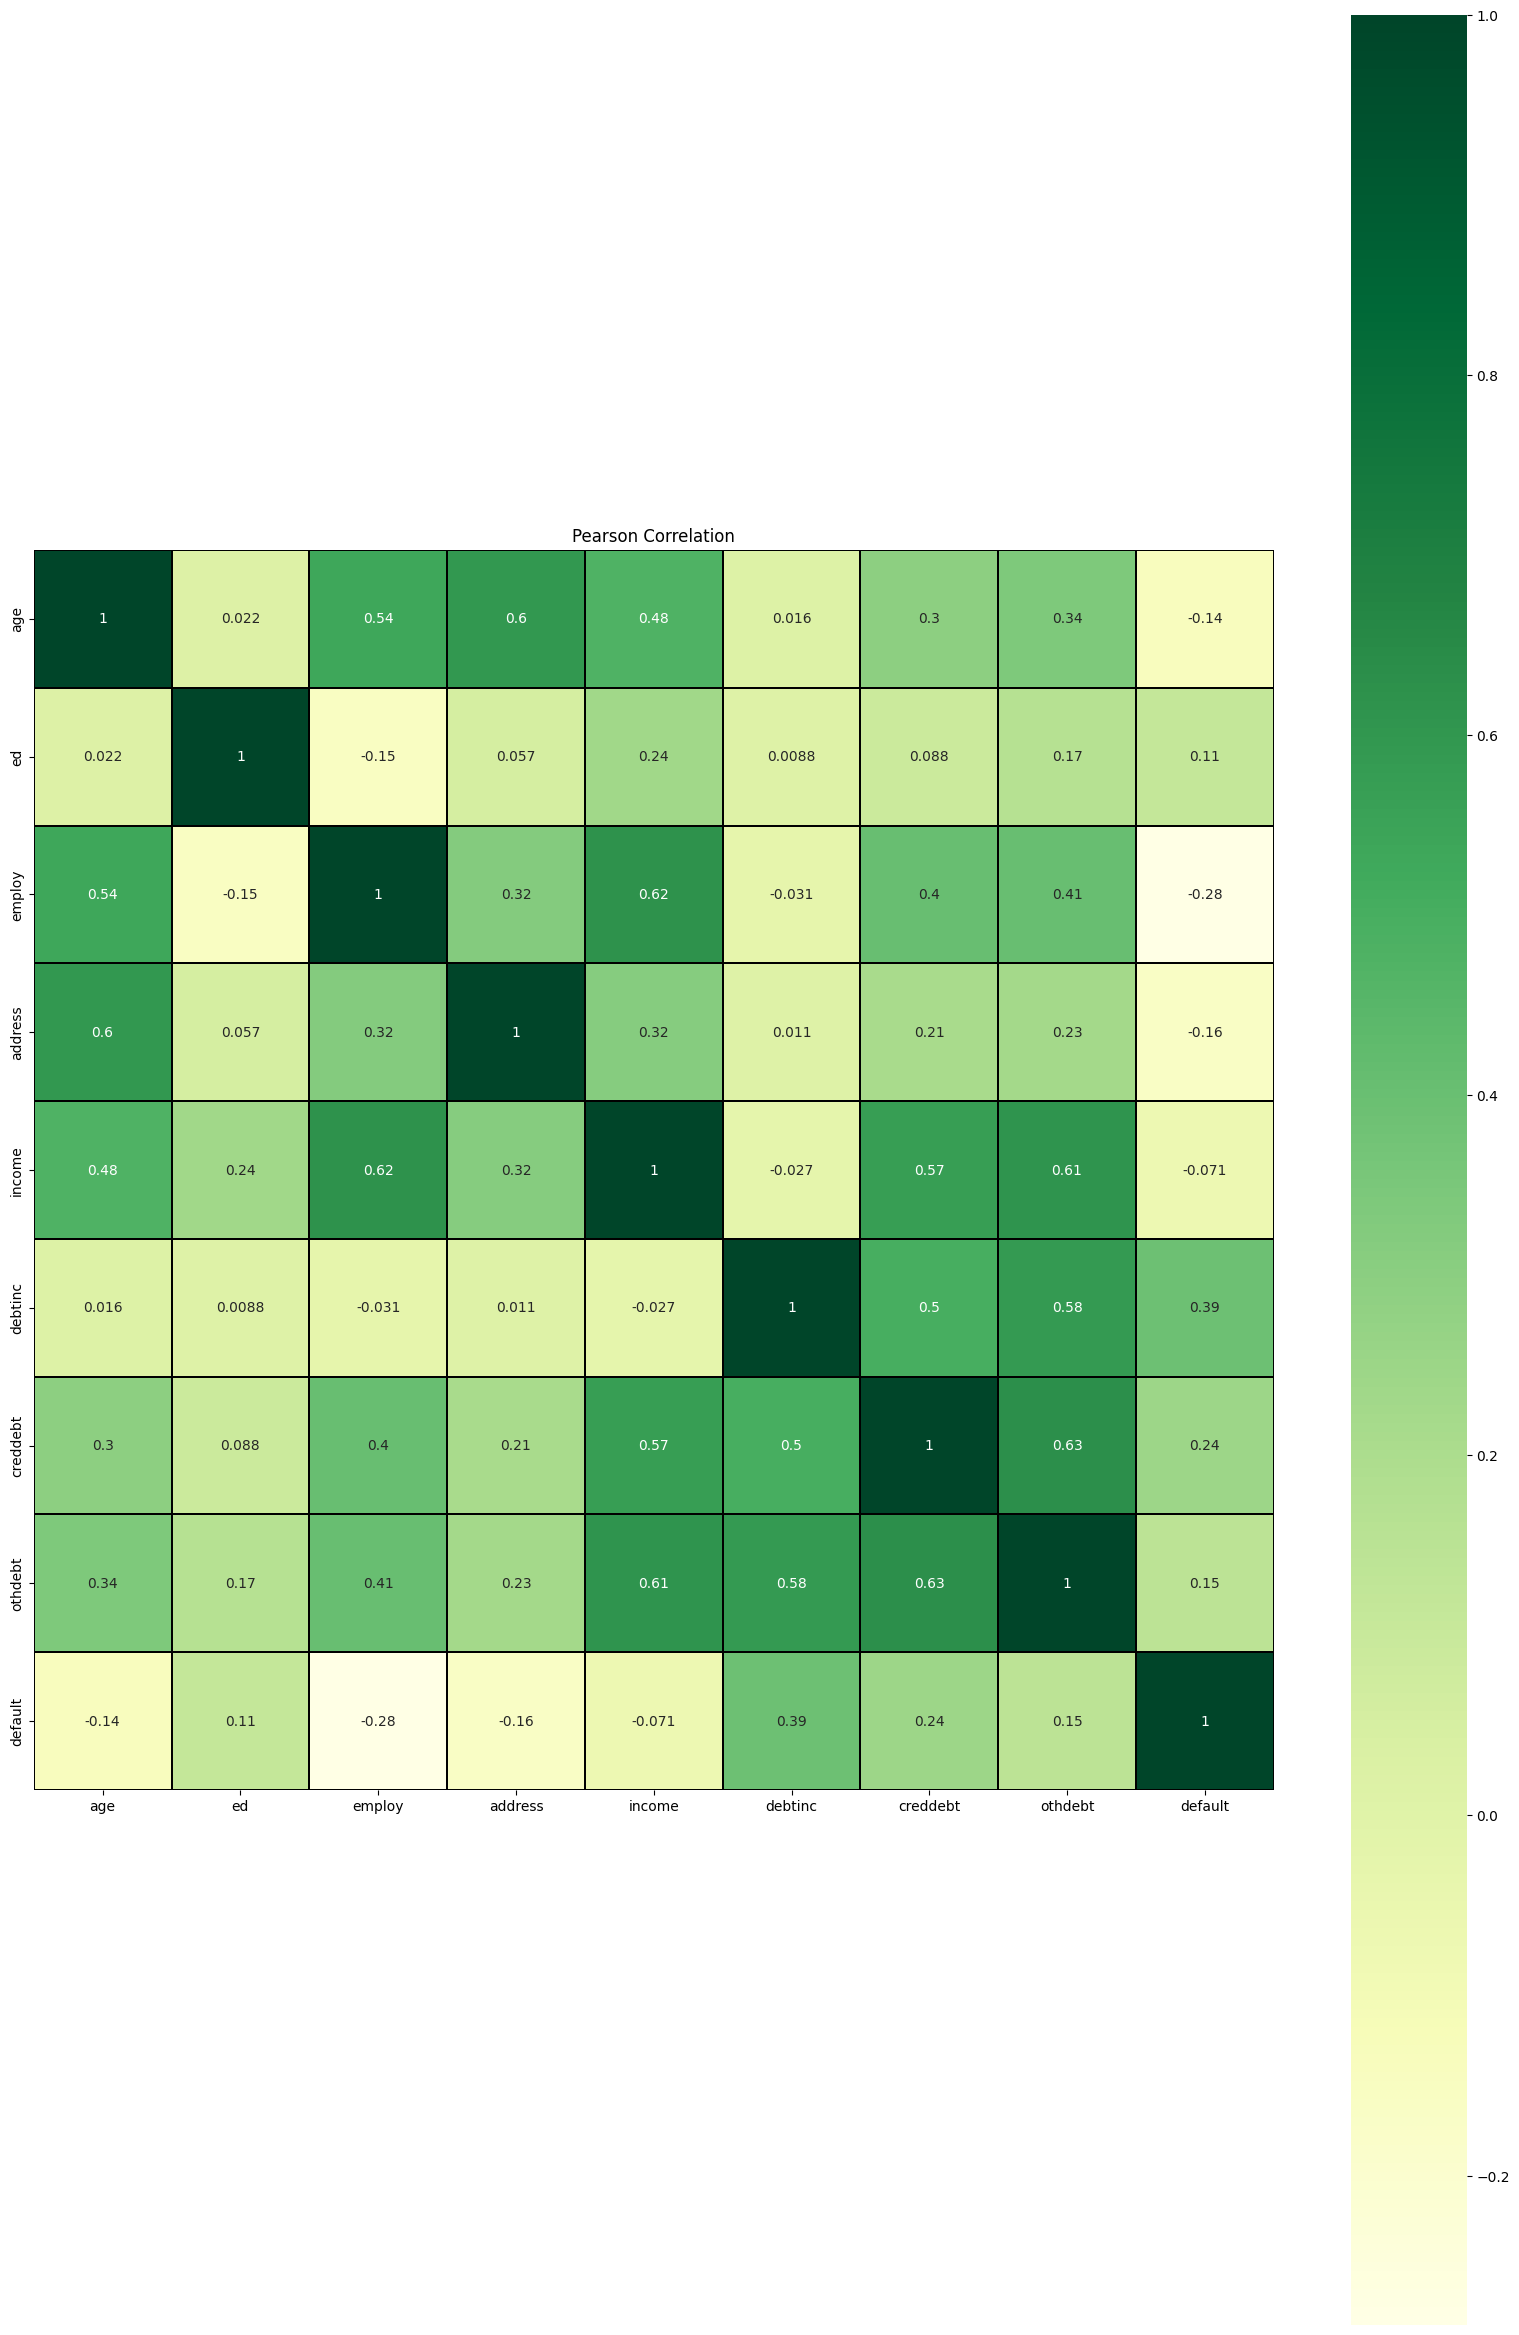

In [ ]:
f, ax = plt.subplots(figsize=(20,30))
plt.title('Pearson Correlation')
sns.heatmap(df.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, cmap='YlGn', linecolor='black', annot=True)

## Hasil Analisa

1. Ditemukan Multicolinieritas.
2. Variabel independen memiliki hubungan yg kuat dengan var independen lainnya (antar variabel independe memiliki hubungan)
3. Jika kondisi demikian, maka bisa disoulusikan dengan algoritma multivariat: ANN,XGBoost, dll
4. Hasil korelasi menunjukan tidak ada linearitas dalam data terkait var independen dan dependen


# Pemodelan Data

In [ ]:
# Input variable x

x1 = df[['age', 'ed', 'employ', 'address', 'income', 'creddebt', 'othdebt', 'default']]

# Input variable y

y1 = df['debtinc']

In [ ]:
# SPLIT Testing & Training ---- Supervised Learning

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1, test_size=0.3, random_state=0)

## Model Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [ ]:
# Membuat objek Algoritma Linear Regression
ln = LinearRegression()

# Memodelkan data menggunakan algoritma linear regression
model_ln = ln.fit(x1_train,y1_train)

# Melakukan predict pada data test
pred_ln = model_ln.predict(x1_test)

In [ ]:
# NIlai R2
print('R Square :', metrics.r2_score(y1_test,pred_ln))

R Square : 0.6336250208511083


In [ ]:
# Membuat Script MAPE

def mean_absolut_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true))*100
print('MAPE :', mean_absolut_percentage_error(y1_test,pred_ln))

MAPE : 53.62909578241847


## Pemodelan Menggunakan XGBoost Classifier




In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Membuat objek Algoritma Linear Regression
xgr = XGBRegressor(n_estimators=100, max_depth=3, random_state=0, learning_rate=0.3)

# Memodelkan data menggunakan algoritma linear regression
model_xgr = xgr.fit(x1_train,y1_train)

# Melakukan predict pada data test
pred_xgr = model_xgr.predict(x1_test)

In [ ]:
# NIlai R2
print('R Square :', metrics.r2_score(y1_test,pred_xgr).round(3))

R Square : 0.962


In [ ]:
# Membuat Script MAPE

def mean_absolut_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true))*100
print('MAPE :', mean_absolut_percentage_error(y1_test,pred_xgr))

MAPE : 12.630122200030359


## Implementasi model XGBoost Regressor pada data nasabah lama (OLD Nasabah)

step 1

Create data OLD nasabah yg akan di predict

step 2

Memodelakan data / membuat data predict

Step 3

Filterring pada hasil predict data OLD nasabah yg creddebt dibawah 30% dan tidak pernah gagal bayar dan itulah yg direalisasikan nilai kreditnya.

In [ ]:
# Data OLD nasabah

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 49.3 KB


In [ ]:
x_2 = df[['age', 'ed', 'employ', 'address', 'income', 'creddebt', 'othdebt', 'default']]

In [ ]:
prediction_xgr = model_xgr.predict(x_2)

prediction_xgr

array([ 9.363784  , 19.726862  ,  5.4952545 ,  2.819631  , 17.902073  ,
       10.151601  , 30.234558  ,  3.750928  , 20.7749    , 19.25811   ,
        1.5903233 ,  5.3810277 , 10.794667  , 16.19936   , 10.1040945 ,
        7.5384207 , 16.676567  ,  7.5869927 ,  5.4170213 ,  1.781978  ,
        3.39093   ,  5.3288503 , 10.376647  , 10.194077  , 18.080278  ,
       18.481049  ,  6.38326   , 15.940971  , 17.660728  , 13.82279   ,
        2.1979153 , 12.670281  ,  5.9318657 , 13.990027  ,  3.7262743 ,
       22.729073  , 16.109558  , 11.955401  , 17.40698   ,  4.1708345 ,
        6.479025  ,  7.24182   ,  4.806515  , 13.609911  ,  7.576236  ,
        6.791273  ,  4.3879957 , 10.360622  , 10.519349  ,  8.980935  ,
       12.150125  , 14.268833  , 12.273414  ,  3.6535978 , 10.4803915 ,
       15.437394  ,  4.442083  ,  2.286279  ,  2.6893692 , 12.296193  ,
        2.3382413 ,  6.535929  , 12.059372  ,  7.118629  ,  7.473982  ,
       23.311068  ,  6.116204  ,  8.707444  ,  8.955772  , 18.24

In [ ]:
df_prediction_xgr = pd.DataFrame({'Prediction': prediction_xgr}).round(2)
df_prediction_xgr

,Prediction
0,9.36
1,19.73
2,5.50
3,2.82
4,17.90
...,...
695,4.45
696,11.34
697,7.69
698,8.55


In [ ]:
# Menghubungan DataFrame hasil prediksi dengan DataFrame input variabel

df_pred_debtinc = pd.concat([df, df_prediction_xgr], sort=True, axis=1)

df_pred_debtinc.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Prediction
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,9.36
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,19.73
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,5.50
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,2.82
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,17.90


## Menentukan Nasabah yg di approve kenaikan limit kredit

In [ ]:
df_approve_limit = df_pred_debtinc[(df_pred_debtinc['creddebt']<=0.3)&(df['default']==0)]

df_approve_limit

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Prediction
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0,3.75
10,27,1,0,1,16,1.7,0.182512,0.089488,0.0,1.59
11,25,1,4,0,23,5.2,0.252356,0.943644,0.0,5.38
19,41,3,0,21,26,1.7,0.099008,0.342992,0.0,1.78
29,26,3,2,1,37,14.2,0.204906,5.049094,0.0,13.82
...,...,...,...,...,...,...,...,...,...,...
679,35,1,17,4,42,3.0,0.093240,1.166760,0.0,3.07
683,21,1,1,1,16,6.3,0.141120,0.866880,0.0,6.19
689,30,1,4,2,18,10.7,0.227268,1.698732,0.0,11.17
690,24,2,0,5,16,7.3,0.024528,1.143472,0.0,7.07


In [ ]:
# Eksport to Excel
# Exsport as download if in colab
from google.colab import files

# Menyimpan file/eksport file to local computer output CSV file

df_approve_limit.to_excel('df_approve_limit.xlsx')
files.download('df_approve_limit.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>